In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
kospi_200_items = pd.read_excel('./cate_scale_fiscal_rate.xlsx')

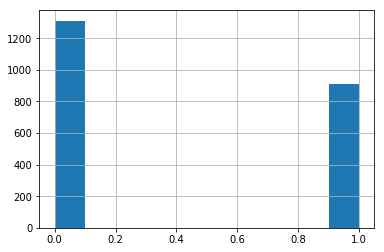

In [30]:
# 0 60% / 1 40%
a = kospi_200_items['수익률 (3개월)(%)']
a.hist()

In [36]:
len(a[a==1]) / 2233

0.4084191670398567

In [3]:
for i in kospi_200_items.columns:
    print( i ,'  ', kospi_200_items[i].isna().sum())

부채비율(%)    0
매출액증가율(전년동기)(%)    0
매출총이익증가율(전년동기)(%)    0
매출총이익증가율(전분기)(%)    0
영업이익증가율(전년동기)(%)    0
영업이익증가율(전분기)(%)    0
총포괄이익증가율(전년동기)(%)    0
총포괄이익증가율(전분기)(%)    0
EBITDA증가율(전년동기)(%)    0
EBITDA증가율(전분기)(%)    0
총자산증가율(전년동기)(%)    0
총자산증가율(전분기)(%)    0
EPS증가율(전년동기)(%)    0
EPS증가율(전분기)(%)    0
BPS증가율(전년동기)(%)    0
BPS증가율(전분기)(%)    0
ROA(총포괄이익)(%)    0
ROE(당기순이익)(%)    0
총자산회전율(회)    0
현금및현금성자산구성비율(%)    0
변동성 (20일)    0
거래량 (20일 평균)(주)    0
외국인보유비중(티커)(%)    0
공매도거래량 (20일)(주)    0
순매수수량(개인)(20일합산)(주)    0
순매수수량(기관계)(20일합산)(주)    0
순매수수량(외국인계)(20일합산)(주)    0
PER(IFRS-연결)    0
PBR(IFRS-연결)    0
수익률 (1개월)(%)    0
Name    0
수익률 (3개월)(%)    0


In [11]:
col = kospi_200_items.columns
col

Index(['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)', '변동성 (20일)',
       '거래량 (20일 평균)(주)', '외국인보유비중(티커)(%)', '공매도거래량 (20일)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)',
       'PER(IFRS-연결)', 'PBR(IFRS-연결)', '수익률 (1개월)(%)', 'Name', '수익률 (3개월)(%)'],
      dtype='object')

In [4]:
cols = ['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)', '변동성 (20일)',
       '거래량 (20일 평균)(주)', '외국인보유비중(티커)(%)', '공매도거래량 (20일)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)',
       'PER(IFRS-연결)', 'PBR(IFRS-연결)', '수익률 (1개월)(%)']

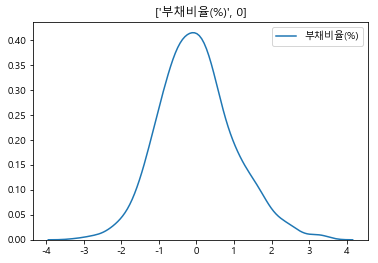

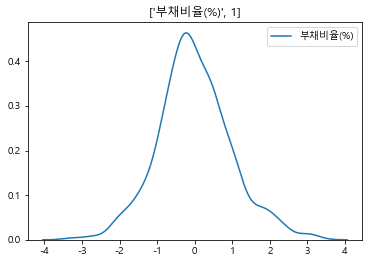

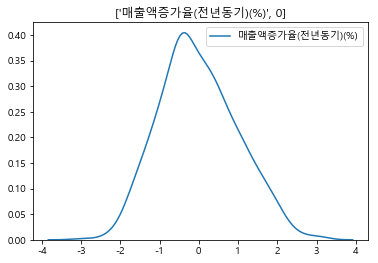

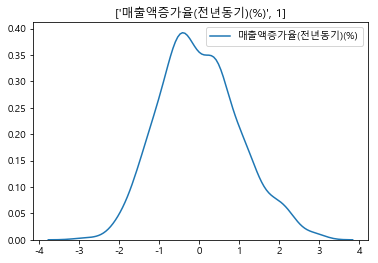

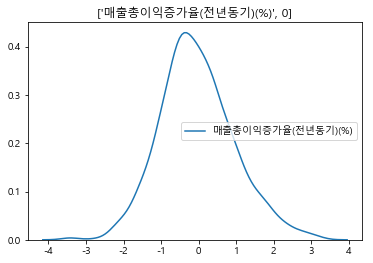

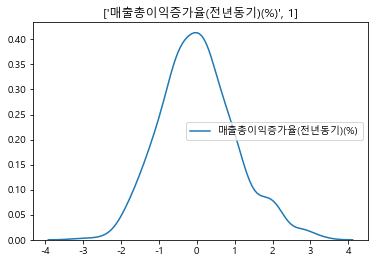

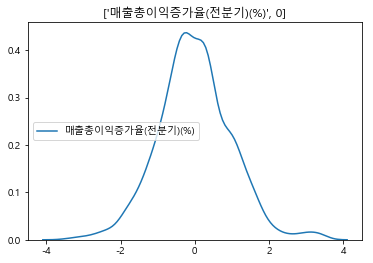

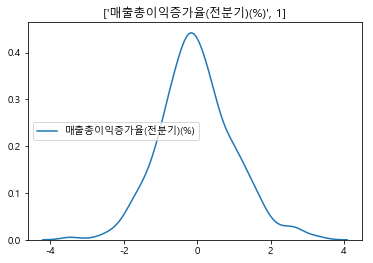

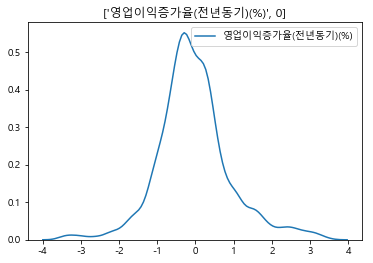

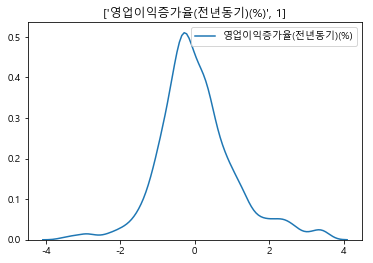

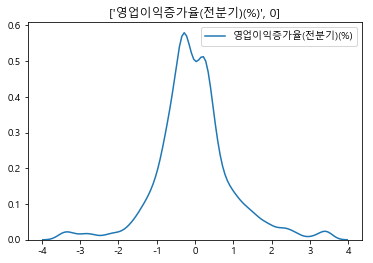

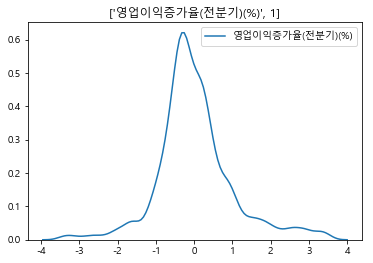

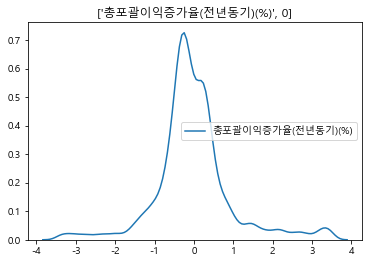

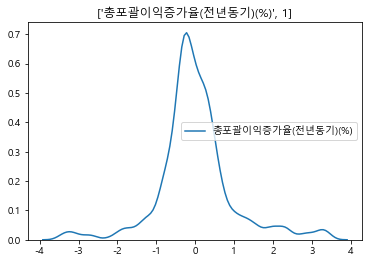

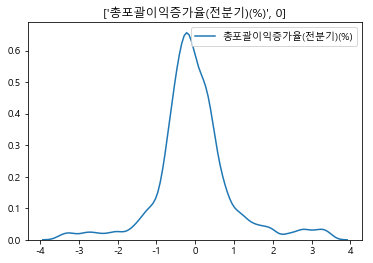

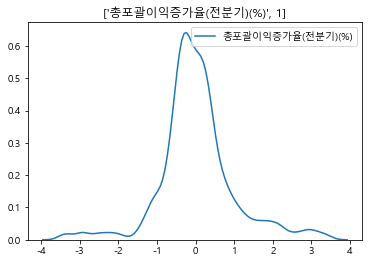

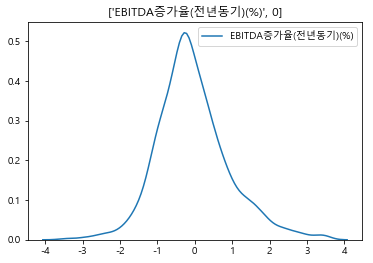

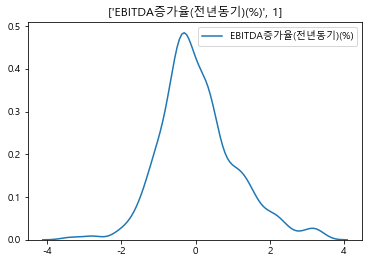

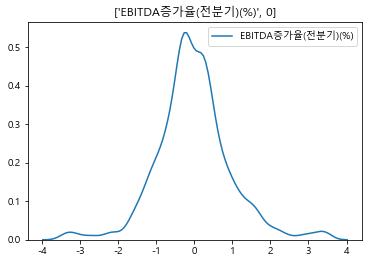

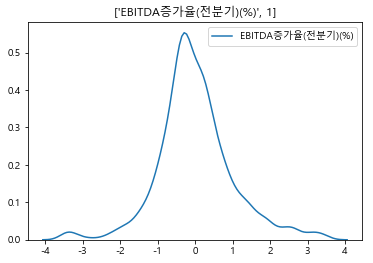

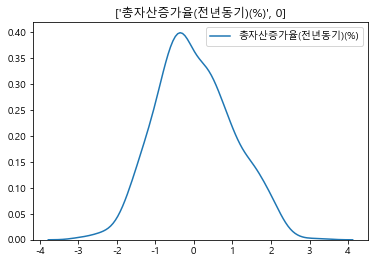

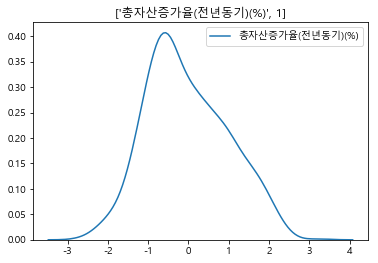

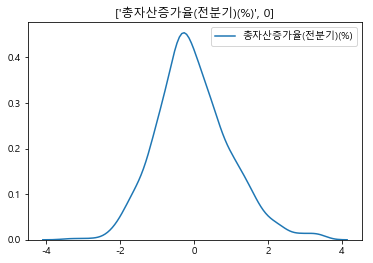

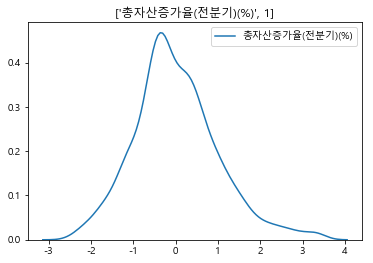

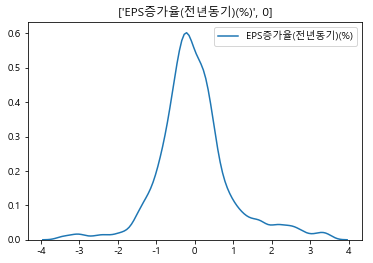

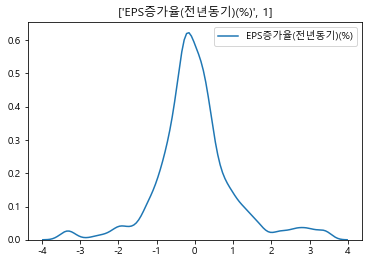

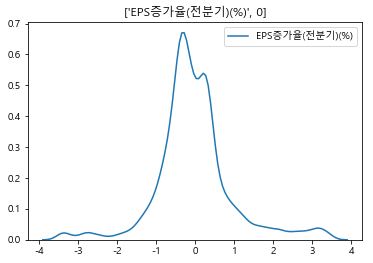

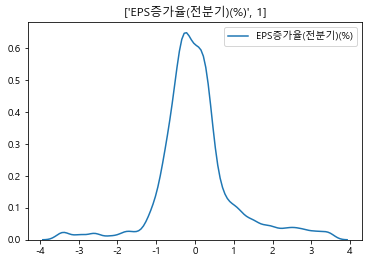

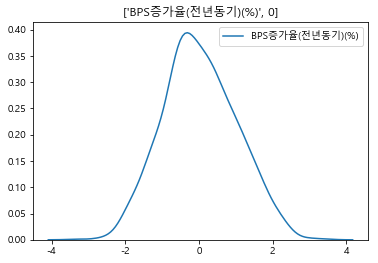

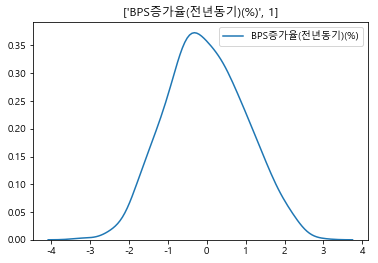

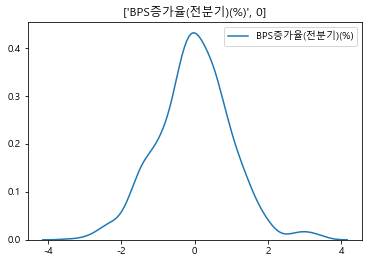

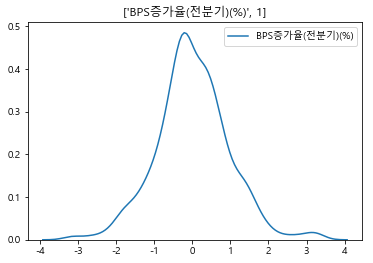

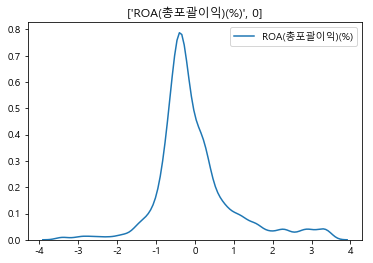

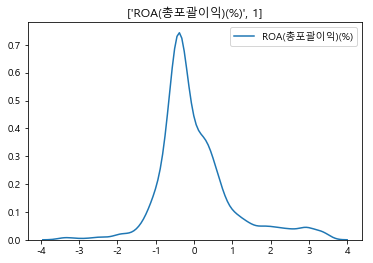

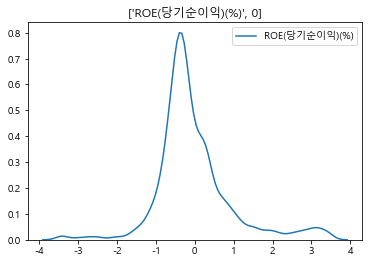

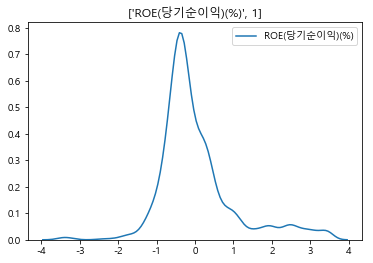

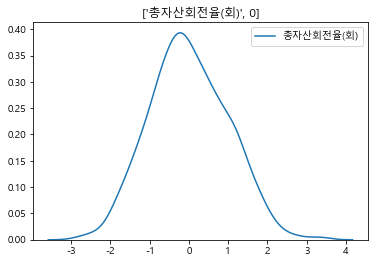

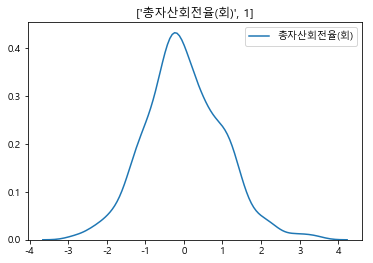

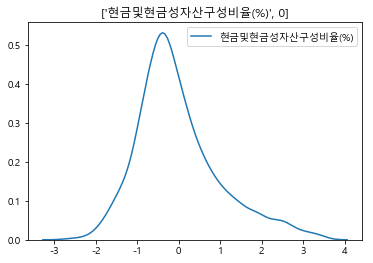

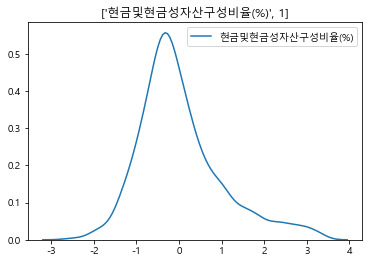

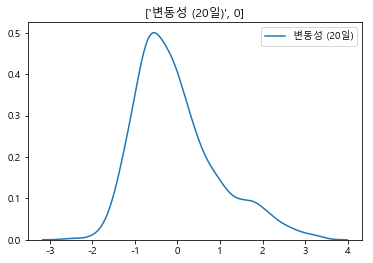

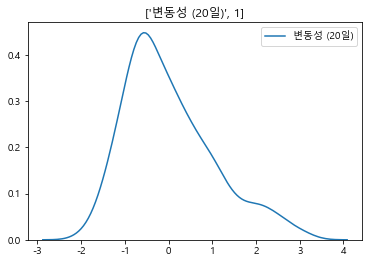

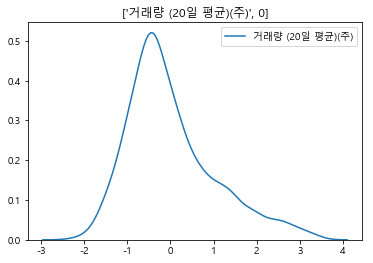

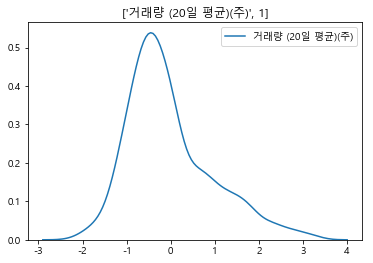

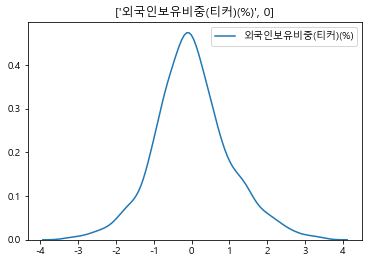

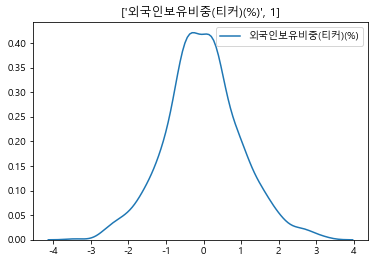

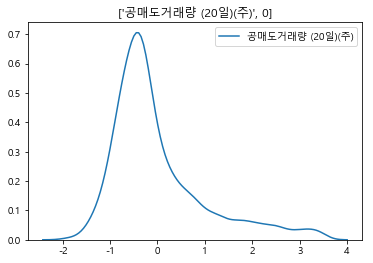

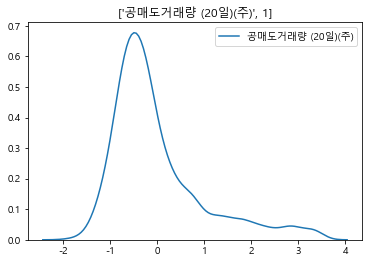

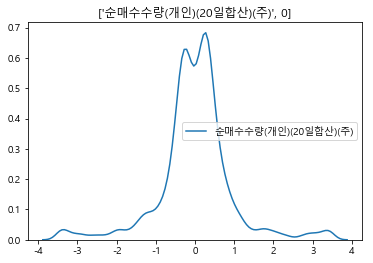

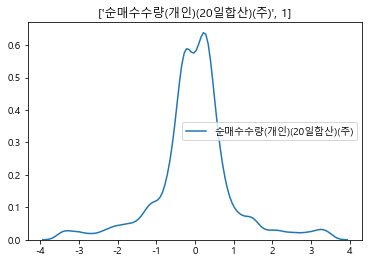

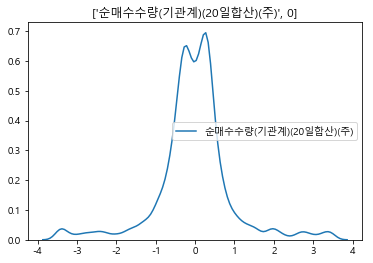

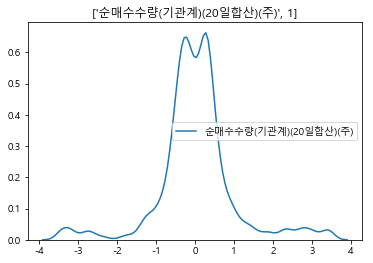

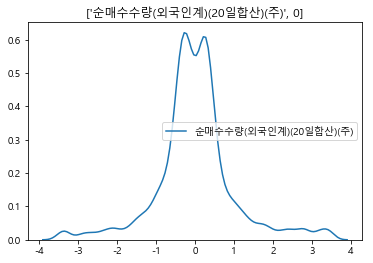

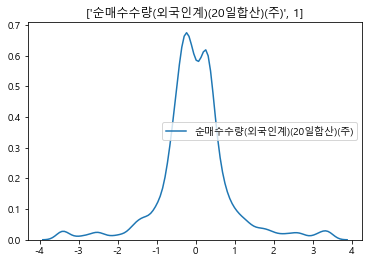

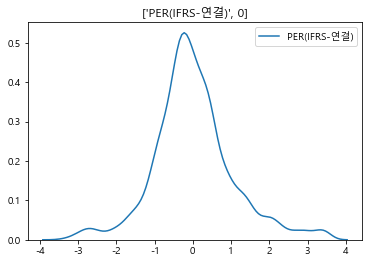

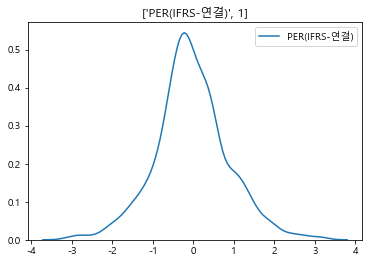

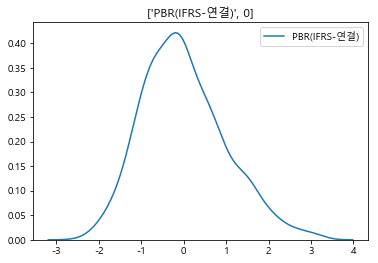

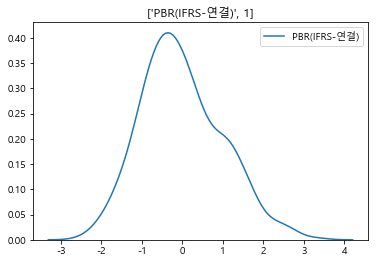

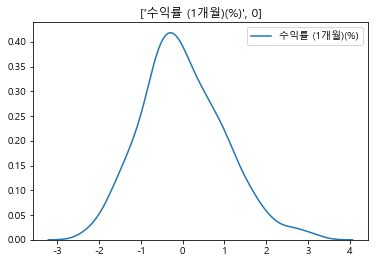

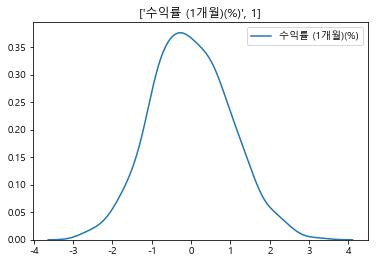

In [7]:
for i in cols:
    for k in [0,1]:
        sns.kdeplot(data=kospi_200_items[kospi_200_items['수익률 (3개월)(%)'] == k][i])
        plt.title([i,k])
        plt.show()

In [12]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    ## 18년도 3,6월 이전 이후로 나누기
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-2])
        test_set = test_set.append(sub_set[-2:])
    return train_set , test_set

In [13]:
train,test = data_sp(kospi_200_items)

In [18]:
## train test를 X,Y 나누기
X_train = train[['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)']]

X_test = test[['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)']]

Y_train = train['수익률 (3개월)(%)']
Y_test = test['수익률 (3개월)(%)']

# Part3: Predictive Modeling


1)Logistic Regression

3)Random Forest

4)K-Nearest Neighbours

7)Logistic Regression

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

In [39]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [2]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'GaussianNB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


NameError: name 'SVC' is not defined

In [46]:
cv_means

[0.54267755766807,
 0.5007526726312307,
 0.5104101842052506,
 0.5367634859285714,
 0.5362750071099216,
 0.5373014000717986,
 0.524958591505081,
 0.5287075949504793,
 0.5507135408653434,
 0.5501787815070547,
 0.5368099529579604]

In [1]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('LR',LogisticRegression(C=0.05)),
                                              ('RFor',RandomForestClassifier(n_estimators=2000,random_state=0)),
                                              ('ExtC',ExtraTreesClassifier()),
                                              ('LDA', LinearDiscriminantAnalysis()),
                                              ('GBC',GradientBoostingClassifier())
                                             ], 
                       voting='soft').fit(X_train,Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,Y_test))
cross=cross_val_score(ensemble_lin_rbf,X_train,Y_train, cv = 10 ,scoring = "precision")
print('The cross validated score is',cross.mean())

NameError: name 'LogisticRegression' is not defined

randomforest / GradianBoosting / SVC( or Extratrees)  / LogisticRegression / lineardiscriminantanalysis

In [45]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {'n_estimators': [500, 1000],
                 'max_features': [2,3,4,5,],
                 'max_depth' : [4,5,6,7,8,9,10],
                 'criterion' :['gini', 'entropy']}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.8min


KeyboardInterrupt: 

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [10,15,20],
              "max_features": [7,8,9,10,11,12],
              "bootstrap": [False],
              "n_estimators" :[2000],
              "criterion": ["gini", 'entropy']}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : [500, 1000],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [10, 15 ,20],
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


In [ ]:
# Gradient boosting tunning

LG = LogisticRegression()
gb_param_grid = {'max_iter': [100, 200 ,400],
                 'C ': [0.01, 0.1, 1 , 10, 100]
                 
              }

gsLG = GridSearchCV(LG,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLG.fit(X_train,Y_train)

LG_bset = gsLG.best_estimator_

# Best score
gsLG.best_score_


In [ ]:
# LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
gb_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto']
              }

gsLDA = GridSearchCV(LDA,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)

LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GBC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLG.best_estimator_,"LG learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLDA.best_estimator_,"LDA learning curves",X_train,Y_train,cv=kfold)



In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("LinearDiscriminantAnalysis", LDA_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),
                     ("GradientBoosting",GBC_best),('Logistic',LG_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [ ]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")
test_Survived_LG = pd.Series(LG_best.predict(test), name="LG")
test_Survived_LDA = pd.Series(LDA_best.predict(test), name="LDA")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_GBC,test_Survived_LG, test_Survived_LDA],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('LDA', LDA_best), ('LG',LG_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)